#########################################################
#                                                       #
#           Exploratory Data Analysis (EDA)             #
#           Prueba 2 Hotel booking demand dataset       #
#                                                       #
#########################################################

In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Create DataFrame
df = pd.read_csv('hotel_bookings.csv')

In [3]:
#Display all DataFrame columns
pd.options.display.max_columns = None

In [4]:
# DataFrame Summary
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
#read data using read_csv
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# Detect null values
print(df.isnull().sum())

for i in df.columns:
  if df[i].isna().sum() != 0:
    print('NULL Values in', i, 'column >>', df[i].isna().sum() )

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
# Summary NULL values
for i in df.columns:
  if df[i].isna().sum() != 0:
    print('NULL Values in', i, 'column >>', df[i].isna().sum() )

NULL Values in children column >> 4
NULL Values in country column >> 488
NULL Values in agent column >> 16340
NULL Values in company column >> 112593


In [8]:
#Handle NULLS

# Assign values in 'children'
df['children'] = df['children'].fillna(0)

# Assign values in 'country'
df['country'] = df['country'].fillna('Unknown')

# Assign values in 'agent'
df['agent'] = df['agent'].fillna('Not assigned')

In [9]:
# Drop 'company' column, too nulls value
df = df.drop(columns = 'company')

In [10]:
# Check if there are still any null values
print(df.isnull().sum())

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [11]:
# Summary NULL values
for i in df.columns:
  if df[i].isna().sum() != 0:
    print('NULL Values in', i, 'column >>', df[i].isna().sum() )

In [12]:
# Convert to Date type
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [13]:
#Create DataFrame with number values
correlation_matrix = df.select_dtypes(include=['number']).corr()

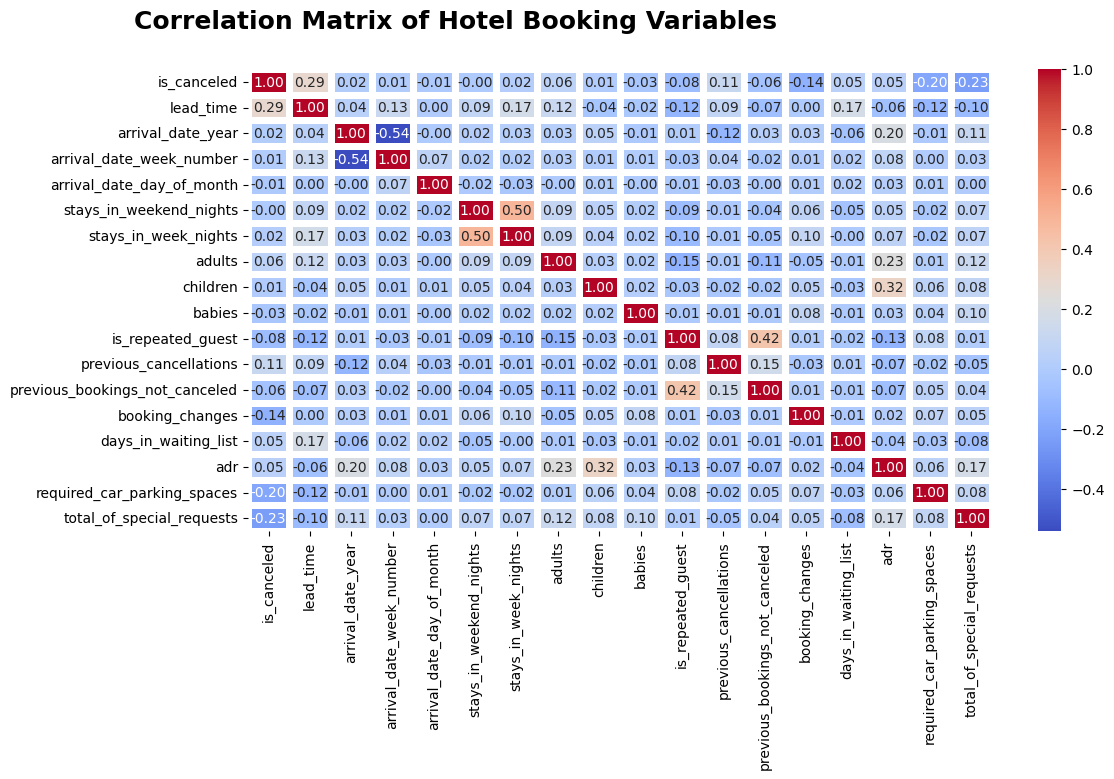

In [14]:
#Correlation Matrix
plt.rcParams['figure.figsize'] = (12, 6)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=5, fmt='.2f', annot_kws={"size": 10})

plt.suptitle('Correlation Matrix of Hotel Booking Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize=18, 
             fontfamily='sans-serif', color='black')

plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()